<a href="https://colab.research.google.com/github/Value1965/CulturalCode/blob/main/%D0%9A%D1%83%D0%BB%D1%8C%D1%82%D1%83%D1%80%D0%BD%D1%8B%D0%B9_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загрузим нужные библиотеки

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np 

%matplotlib inline
!pip install navec
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
from navec import Navec
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-09-30 17:24:34--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  16.4MB/s    in 3.4s    

2022-09-30 17:24:39 (14.8 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [3]:
path = '/content/navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/hacks_ai_2022/Вологда/train_dataset_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/hacks_ai_2022/Вологда/test_dataset_test.csv")

## Рассмотрим датасет по ближе

In [5]:
df_train.head(10)

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
0,6145,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,Айгуль Ляпина,5.0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,3,0,0,0,0,0
1,7006,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Olga T,5.0,"Удивительно, что сейчас возникает ТАКАЯ литера...",0,1,0,0,0,0,1
2,1124,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Кирилл Чириков,5.0,"Душевно, жизненно, чувственно, проникновенно!!...",0,0,0,1,0,0,1
3,4716,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post/,3.9,430,48,Kimetov Oleg,5.0,Очень понравилось. Причем понравилось больше «...,2,7,0,1,0,0,0
4,2946,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post-...,4.4,832,113,Сергей Никитин,5.0,Круто. Автор и он же чтец – гений. Прослушал н...,1,0,0,0,0,0,0
5,592,Санькя,Захар Прилепин,https://www.litres.ru/zahar-prilepin/sankya-16...,4.1,274,37,Кирилл К,3.0,"Вообще Прилепин пишет хорошо. Хорошо читается,...",0,1,0,0,0,0,0
6,7635,Обитель,Захар Прилепин,https://www.litres.ru/zahar-prilepin/obitel/,4.5,1916,171,Сергей Киряков,5.0,"Это вторая книга атора, которую я прочитал. Ни...",0,0,0,1,0,0,1
7,7226,Батюшки мои,Валентин Курбатов,https://www.litres.ru/valentin-kurbatov/batush...,4.7,3,6,Елена Тимофеева,NaN,церковь в начале 90-х В центре повествования П...,1,1,1,1,0,0,1
8,6194,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,yuliya_bv,5.0,Роман произвёл очень сильное впечатление. Авто...,1,3,1,1,0,0,1
9,3276,Текст,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/tekst/,4.4,7276,622,shilina.anna,5.0,"На одном дыхании. Без соплей, без чернухи, как...",0,1,0,0,0,0,1


In [6]:
df_train['Отзыв'][8]

'Роман произвёл очень сильное впечатление. Автор очень емко, лаконично и так жизненно описывает события того времени, что заставляет погружаться, проникаться характерами, мыслями героев. Язык изложения простой и понятный, легкий. Сюжет, несмотря на кажущуюся легкость линии, наполнен многогранными событиями, непростыми людскими взаимоотношениями. Несправедливость, жестокость, невежество «героев» того времени. Стойкость, покорность и великодушнее «врагов... Далее'

In [7]:
df_train.shape

(4839, 17)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RecordNo                              4839 non-null   int64  
 1   Название книги                        4839 non-null   object 
 2   Автор                                 4839 non-null   object 
 3   Ссылка на литрес                      4839 non-null   object 
 4   Рейтинг                               4839 non-null   float64
 5   Количество оценок                     4839 non-null   int64  
 6   Количество отзывов                    4839 non-null   int64  
 7   Имя читателя                          4839 non-null   object 
 8   Оценка книги читателем (из 5 баллов)  4070 non-null   float64
 9   Отзыв                                 4839 non-null   object 
 10  Лайки на отзыв                        4839 non-null   int64  
 11  Дислайки на отзыв

## Загрузим стоп - слова.

In [9]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
words_stop = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Загрузим лексический анализатор

In [10]:
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import re
import string
import numpy as np

ch=navec['непринужденность']
ch=navec['человека']
zero_word=np.zeros_like(ch)


def sentence_embedding(s):
  sum_word=zero_word.copy()
  s_list = re.findall(r'\b\w+\b', s)
  for w in s_list:
    w=w.lower()
    p = morph.parse(w)[0]
  
    w=p.normal_form
    w = w.replace('ё','е')
    if w not in words_stop:
      if w in navec:
        sum_word=sum_word+navec[w]
  sum_word=sum_word/len(s_list)
  return sum_word





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.5 MB/s 
     |████████████████████████████████| 8.2 MB 11.1 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=daec39ecc0d1014e69e005fe09d0eb09420f036c055b2f6287f911d057ec56c2
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


## Построение эмбединга культурного кода

In [11]:
ch.shape

(300,)

In [12]:
putin='жизнь,достоинство, права и свободы человека, патриотизм, гражданственность,служение Отечеству и ответственность за его судьбу, высокие нравственные идеалы, крепкая семья, созидательный труд, приоритет духовного над материальным, гуманизм, милосердие, справедливость, коллективизм,взаимопомощь и взаимоуважение, историческая память и преемственность поколений, единство народов России'
culturalCode = 'жизнь человек,достоинство человек, право человек,свобода человек,патриотизм, гражданственность,служение отечество,ответственность судьба отечество,высокий нравственный идеал, крепкий семья, созидательный труд,приоритет духовное материальное, гуманизм, милосердие, справедливость, коллективизм,взаимопомощь, взаимоуважение, исторический память , преемственность поколение, единство народ Россия'
culturalList = culturalCode.split(',')

culturalEmbeddingList=[]

for wc in culturalList:
  wc=wc.lower()
  e=zero_word
  print(wc)
  wcl=wc.strip().split(' ')
  for w in wcl:
    p = morph.parse(w)[0]
    w = p.normal_form
    e=e+navec[w]
  culturalEmbeddingList.append(e)
sumCulturalEmbedding=np.sum(culturalEmbeddingList, axis=0)
sumCulturalEmbedding.shape

жизнь человек
достоинство человек
 право человек
свобода человек
патриотизм
 гражданственность
служение отечество
ответственность судьба отечество
высокий нравственный идеал
 крепкий семья
 созидательный труд
приоритет духовное материальное
 гуманизм
 милосердие
 справедливость
 коллективизм
взаимопомощь
 взаимоуважение
 исторический память 
 преемственность поколение
 единство народ россия


(300,)

## Добавим новых признаков

In [13]:
def get_value(s):
  v = 0
  s_list = re.findall(r'\b\w+\b', s)
  for w in s_list:
    w=w.lower()
    p = morph.parse(w)[0]
  
    w=p.normal_form
    w = w.replace('ё','е')
    if w not in words_stop:
      if w in navec:
        ew = navec[w]
        for ewc in culturalEmbeddingList:
          
          cs=cosine_similarity(ew.reshape(1,-1),ewc.reshape(1,-1))
          if cs>v:
            v=cs

  return v[0][0]


def get_culturalcode(s):
  e=sentence_embedding(s)
  p_e=sentence_embedding(putin)
  return cosine_similarity(e.reshape(1,-1),p_e.reshape(1,-1))[0][0]



In [14]:
def add_features(df):
  df["len_reviews"] = df["Отзыв"].map(len)

  df["Автор"] = pd.Categorical(df["Автор"])
  df["Автор"].astype('category').cat.codes
  df["Автор"] = df["Автор"].cat.codes

  df["Соответствие коду"] = df["Отзыв"].apply(get_culturalcode)
  df["Наличие ценности"] = df["Отзыв"].apply(get_value)
  df = df.fillna(0)
  return df

df_train = add_features(df_train)

In [15]:
df_train

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности,len_reviews,Соответствие коду,Наличие ценности
0,6145,Зулейха открывает глаза,23,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,Айгуль Ляпина,5.0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,3,0,0,0,0,0,157,0.224231,0.560612
1,7006,Зулейха открывает глаза,23,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Olga T,5.0,"Удивительно, что сейчас возникает ТАКАЯ литера...",0,1,0,0,0,0,1,283,0.416482,0.839078
2,1124,Дети мои,23,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Кирилл Чириков,5.0,"Душевно, жизненно, чувственно, проникновенно!!...",0,0,0,1,0,0,1,278,0.590521,0.720377
3,4716,ПОСТ,27,https://www.litres.ru/dmitriy-gluhovskiy/post/,3.9,430,48,Kimetov Oleg,5.0,Очень понравилось. Причем понравилось больше «...,2,7,0,1,0,0,0,342,0.441826,0.459058
4,2946,ПОСТ,27,https://www.litres.ru/dmitriy-gluhovskiy/post-...,4.4,832,113,Сергей Никитин,5.0,Круто. Автор и он же чтец – гений. Прослушал н...,1,0,0,0,0,0,0,177,0.400260,0.634371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,1196,Дети мои,23,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,417504557,4.0,Ещё один замечательный роман Гузель Яхиной! По...,0,0,0,0,0,0,0,149,0.237530,0.416298
4835,1810,Авиатор,28,https://www.litres.ru/evgeniy-vodolazkin/aviator/,4.5,3551,260,Viktoria Steinbach,0.0,Как всегда у Водолазкина – увлекательнейший сю...,0,1,1,1,0,0,1,468,0.501198,0.513130
4836,3220,Текст,27,https://www.litres.ru/dmitriy-gluhovskiy/tekst...,4.5,1923,246,AnVer,5.0,"Мрачно, грустно. Давно такого не читала и хват...",1,2,0,0,1,0,0,148,0.233595,0.489536
4837,4480,Зулейха открывает глаза,23,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Мария Перешивко,5.0,Очень интересная книга! Как будто очутилась в ...,0,1,0,0,0,0,0,139,0.295036,0.465320


In [16]:
df_train[df_train['Ценности']==1][['Отзыв','Ценности','Наличие ценности','RecordNo']].head(30)

,Отзыв,Ценности,Наличие ценности,RecordNo
1,"Удивительно, что сейчас возникает ТАКАЯ литера...",1,0.839078,7006
2,"Душевно, жизненно, чувственно, проникновенно!!...",1,0.720377,1124
6,"Это вторая книга атора, которую я прочитал. Ни...",1,0.839078,7635
7,церковь в начале 90-х В центре повествования П...,1,0.839078,7226
8,Роман произвёл очень сильное впечатление. Авто...,1,0.480657,6194
9,"На одном дыхании. Без соплей, без чернухи, как...",1,0.518962,3276
10,Потрясающая книга! Прочитав и перечитав всю Ул...,1,0.556455,5321
11,Начал знакомство с творчеством Пелевина с этой...,1,0.578850,3383
12,"“Прощание с Матёрой” – книга, которую многие м...",1,0.839078,80
13,"Первая часть книги – там, где национальный кол...",1,0.839078,4990


In [17]:
df_train[df_train['Ценности']==0][['Отзыв','Ценности','Наличие ценности','RecordNo']].head(30)

,Отзыв,Ценности,Наличие ценности,RecordNo
0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,0.560612,6145
3,Очень понравилось. Причем понравилось больше «...,0,0.459058,4716
4,Круто. Автор и он же чтец – гений. Прослушал н...,0,0.634371,2946
5,"Вообще Прилепин пишет хорошо. Хорошо читается,...",0,0.531193,592
15,Спасибо автору прежде всего за прекрасный русс...,0,0.836684,6554
16,"Очень тонкая и чуткая книга, полная страданий ...",0,0.836684,4843
20,"Прочла в первый раз два года назад, тогда рома...",0,0.544192,6052
21,впечатление о книге Книга Марины Степновой Жен...,0,0.535746,648
22,"Книга хороша. Она была первой, которую я решил...",0,0.535746,2703
23,"Потрясающая книга! Ощущение, что её писал друг...",0,0.484374,5310


In [18]:
df_train[df_train['RecordNo']==6194]['Отзыв']

8    Роман произвёл очень сильное впечатление. Авто...
Name: Отзыв, dtype: object

## Построим на распределение данных

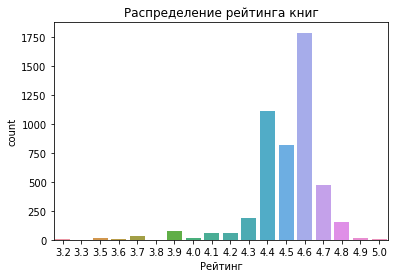

In [19]:
_ = sns.countplot(x = "Рейтинг" , data  = df_train).set_title('Распределение рейтинга книг')

Взглянем на несколько величин сразу

In [20]:
df_train.columns.values

array(['RecordNo', 'Название книги', 'Автор', 'Ссылка на литрес',
       'Рейтинг', 'Количество оценок', 'Количество отзывов',
       'Имя читателя', 'Оценка книги читателем (из 5 баллов)', 'Отзыв',
       'Лайки на отзыв', 'Дислайки на отзыв', 'Релевантность',
       'Таксономия релевантные', 'Таксономия не релевантные',
       'Длина отзыва', 'Ценности', 'len_reviews', 'Соответствие коду',
       'Наличие ценности'], dtype=object)

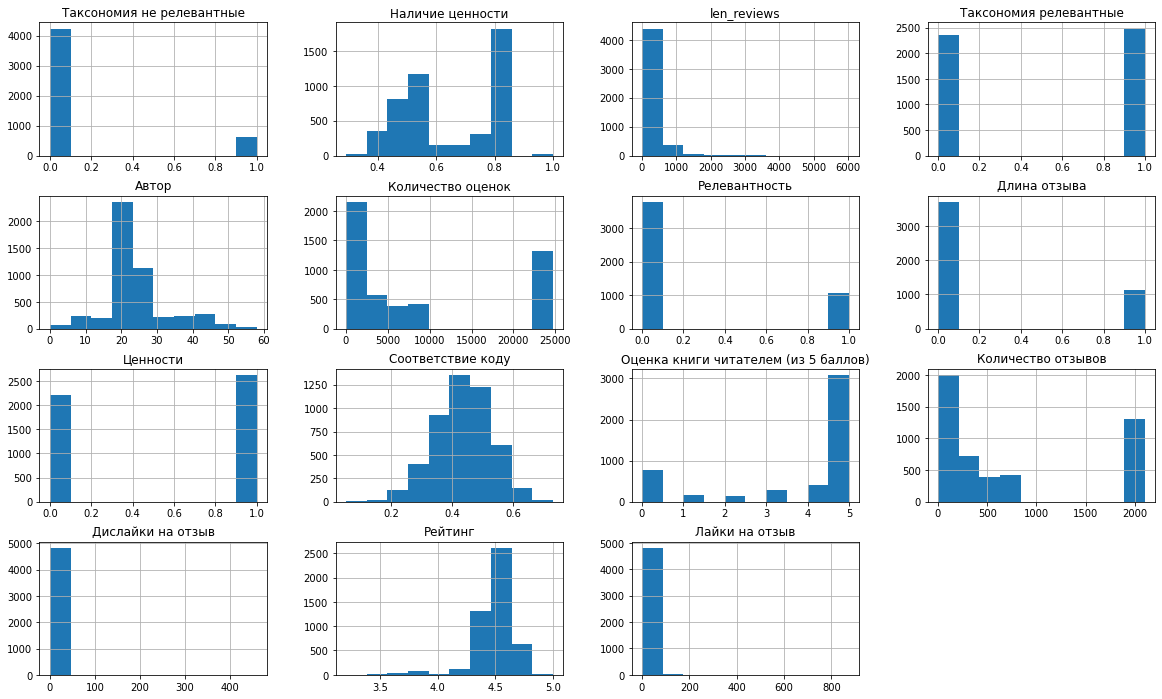

In [21]:
features = list(set(df_train.columns.values) - set(['RecordNo']))

_ = df_train[features].hist(figsize=(20,12))

In [22]:
df_train["Дислайки на отзыв"].value_counts()

0      2304
1      1487
2       320
3       275
4       147
5        79
6        51
7        31
8        28
10       14
13       12
9        11
11        9
12        8
16        7
19        5
14        4
35        4
17        4
15        4
28        3
21        2
18        2
32        2
108       2
22        2
24        2
29        1
117       1
235       1
181       1
459       1
56        1
69        1
37        1
256       1
147       1
317       1
57        1
66        1
91        1
53        1
33        1
20        1
41        1
40        1
23        1
Name: Дислайки на отзыв, dtype: int64

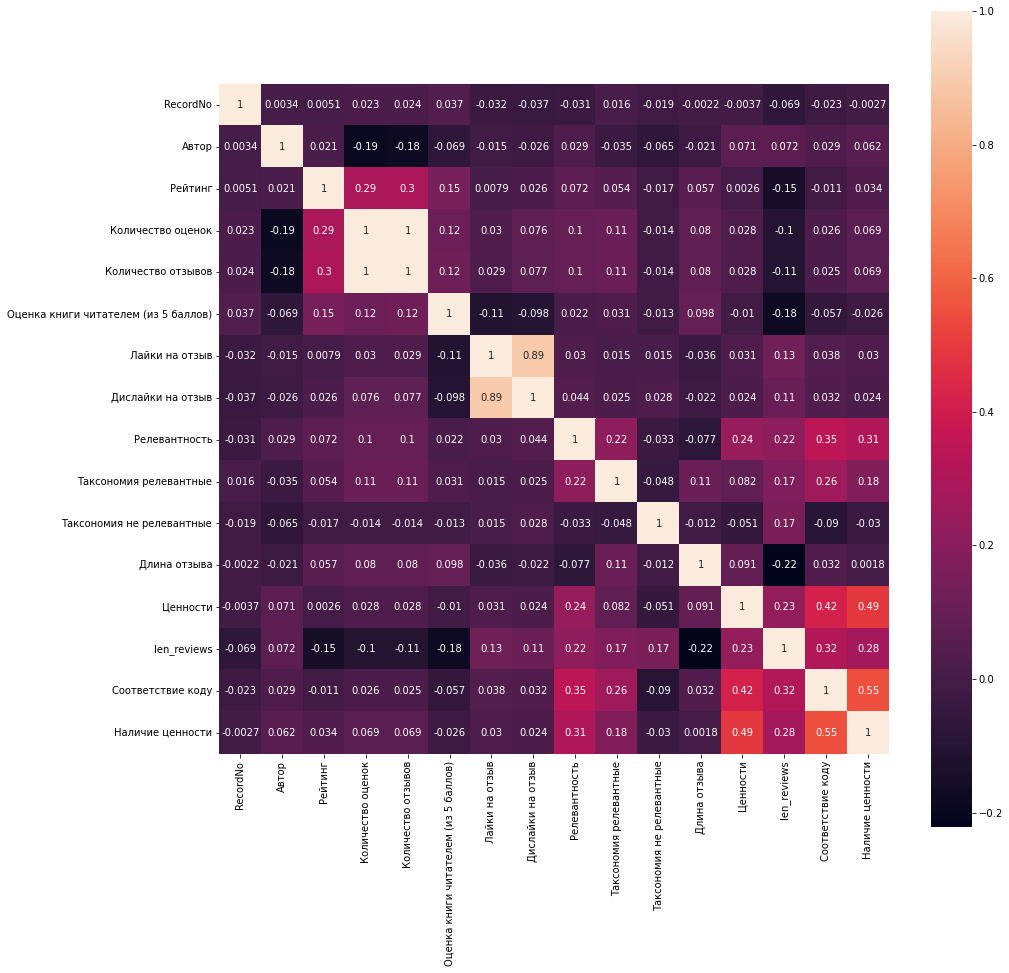

In [23]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

## Выделим выборки

In [24]:
mass_label = ['Релевантность',
       'Таксономия релевантные', 'Таксономия не релевантные',
       'Длина отзыва', 'Ценности']

In [25]:
object_label = df_train.dtypes[df_train.dtypes == "object"].index.values

In [26]:
object_label = np.append(object_label,"RecordNo")

In [27]:
X = df_train.drop(mass_label, axis = 1)
X = X.drop(object_label, axis = 1)

y = df_train[mass_label]

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Автор                                 4839 non-null   int8   
 1   Рейтинг                               4839 non-null   float64
 2   Количество оценок                     4839 non-null   int64  
 3   Количество отзывов                    4839 non-null   int64  
 4   Оценка книги читателем (из 5 баллов)  4839 non-null   float64
 5   Лайки на отзыв                        4839 non-null   int64  
 6   Дислайки на отзыв                     4839 non-null   int64  
 7   len_reviews                           4839 non-null   int64  
 8   Соответствие коду                     4839 non-null   float32
 9   Наличие ценности                      4839 non-null   float32
dtypes: float32(2), float64(2), int64(5), int8(1)
memory usage: 307.3 KB


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [30]:
clf = RandomForestClassifier(random_state=0)

In [31]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
y_train_v = y_train['Ценности']

In [34]:
!pip install catboost
from catboost import CatBoostClassifier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [35]:
clf_v = CatBoostClassifier(random_state=0)
clf_v.fit(X_train, y_train_v)

Learning rate set to 0.017345
0:	learn: 0.6807215	total: 48.8ms	remaining: 48.7s
1:	learn: 0.6681005	total: 51.2ms	remaining: 25.6s
2:	learn: 0.6564930	total: 53.6ms	remaining: 17.8s
3:	learn: 0.6463807	total: 56ms	remaining: 13.9s
4:	learn: 0.6361160	total: 58.5ms	remaining: 11.6s
5:	learn: 0.6315552	total: 60.8ms	remaining: 10.1s
6:	learn: 0.6223414	total: 63.2ms	remaining: 8.96s
7:	learn: 0.6139230	total: 65.7ms	remaining: 8.14s
8:	learn: 0.6053833	total: 68.2ms	remaining: 7.51s
9:	learn: 0.6016465	total: 70.6ms	remaining: 6.99s
10:	learn: 0.5945746	total: 73.1ms	remaining: 6.57s
11:	learn: 0.5878165	total: 75.4ms	remaining: 6.21s
12:	learn: 0.5813394	total: 78ms	remaining: 5.92s
13:	learn: 0.5752249	total: 80.4ms	remaining: 5.66s
14:	learn: 0.5698860	total: 82.8ms	remaining: 5.43s
15:	learn: 0.5671966	total: 85.1ms	remaining: 5.23s
16:	learn: 0.5647333	total: 87.6ms	remaining: 5.07s
17:	learn: 0.5622274	total: 90ms	remaining: 4.91s
18:	learn: 0.5600356	total: 92.4ms	remaining: 4.77

## Оценка точности

In [43]:
pred = clf.predict(X_test)
pred_v = clf_v.predict(X_test)

In [48]:
pred[:,4]

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
pred_v.shape

(1452,)

In [49]:
pred[:,4] = pred_v

In [33]:
y_test.head(3)

,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
3199,0,0,0,0,1
2527,0,0,1,0,0
4100,1,1,0,0,1


In [ ]:
#y_test_v = y_test['Ценности']

In [50]:
from sklearn.metrics import recall_score

print("Recall score:", recall_score(y_test, pred, average='macro'))

Recall score: 0.3978073868205561


In [51]:
#df_test["len_reviews"] = df_test["Отзыв"].map(len)

#df_test["Автор"] = pd.Categorical(df_test["Автор"])
#df_test["Автор"].astype('category').cat.codes
#df_test["Автор"] = df_test["Автор"].cat.codes

#df_test["Соответствие коду"] = df_test["Отзыв"].apply(get_culturalcode)
#df_test["Наличие ценности"] = df_test["Отзыв"].apply(get_value)

#df_test.fillna(0)

df_test = add_features(df_test)

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RecordNo                              2075 non-null   int64  
 1   Название книги                        2075 non-null   object 
 2   Автор                                 2075 non-null   int8   
 3   Ссылка на литрес                      2075 non-null   object 
 4   Рейтинг                               2075 non-null   float64
 5   Количество оценок                     2075 non-null   int64  
 6   Количество отзывов                    2075 non-null   int64  
 7   Имя читателя                          2075 non-null   object 
 8   Оценка книги читателем (из 5 баллов)  2075 non-null   float64
 9   Отзыв                                 2075 non-null   object 
 10  Лайки на отзыв                        2075 non-null   int64  
 11  Дислайки на отзыв

In [53]:
#X = df_test.drop(mass_label, axis = 1)
Y = df_test['RecordNo']
X = df_test.drop(object_label, axis = 1)

X.fillna(0)



,Автор,Рейтинг,Количество оценок,Количество отзывов,Оценка книги читателем (из 5 баллов),Лайки на отзыв,Дислайки на отзыв,len_reviews,Соответствие коду,Наличие ценности
0,19,4.4,8032,702,5.0,2,0,181,0.526068,0.839078
1,23,4.5,1923,246,5.0,1,0,219,0.416510,0.535746
2,23,4.4,7276,622,5.0,0,0,390,0.425205,0.839078
3,19,4.6,24719,2103,0.0,4,0,280,0.398782,0.728120
4,19,4.6,24719,2103,0.0,0,1,136,0.393874,0.836684
...,...,...,...,...,...,...,...,...,...,...
2070,19,4.6,24719,2103,5.0,0,1,243,0.409244,0.839078
2071,19,4.4,8032,702,4.0,0,0,186,0.319362,0.424677
2072,19,4.6,24719,2103,5.0,0,1,324,0.562698,0.839078
2073,41,4.8,1455,189,5.0,0,0,217,0.562532,0.485680


In [54]:
X=X.fillna(0.0)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Автор                                 2075 non-null   int8   
 1   Рейтинг                               2075 non-null   float64
 2   Количество оценок                     2075 non-null   int64  
 3   Количество отзывов                    2075 non-null   int64  
 4   Оценка книги читателем (из 5 баллов)  2075 non-null   float64
 5   Лайки на отзыв                        2075 non-null   int64  
 6   Дислайки на отзыв                     2075 non-null   int64  
 7   len_reviews                           2075 non-null   int64  
 8   Соответствие коду                     2075 non-null   float32
 9   Наличие ценности                      2075 non-null   float32
dtypes: float32(2), float64(2), int64(5), int8(1)
memory usage: 131.8 KB


In [56]:
pred=clf.predict(X)
pred_v=clf_v.predict(X)
pred[:,4] = pred_v

In [57]:
df_pred = pd.DataFrame(pred, columns = ['Релевантность','Таксономия релевантные','Таксономия не релевантные','Длина отзыва','Ценности'])

In [58]:
df_pred.insert(0,'RecordNo',Y)


In [59]:
df_pred.to_csv('solution.csv',index=False)